In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# CNN model-1 using 3 conv Layers

In [0]:
model_1=Sequential()

model_1.add(Conv2D(64,(3,3),padding="same",strides=1,activation="relu",input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(64,(3,3),padding="same",strides=1,activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64,(3,3),padding="same",strides=1,activation="relu"))
model_1.add(Dropout(0.25))

model_1.add(Flatten())

model_1.add(Dense(128,activation="relu"))
model_1.add(Dropout(0.5))

model_1.add(Dense(num_classes,activation="softmax"))

In [0]:
model_1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_1=model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 175us/step - loss: 0.2784 - acc: 0.9123 - val_loss: 0.0504 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0845 - acc: 0.9748 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0622 - acc: 0.9817 - val_loss: 0.0268 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0517 - acc: 0.9849 - val_loss: 0.0241 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0451 - acc: 0.9863 - val_loss: 0.0236 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0414 - acc: 0.9876 - val_loss: 0.0234 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0369 - acc: 0.9886 - val_loss: 0.0260 -

Test score: 0.021477108696162442
Test accuracy: 0.9927


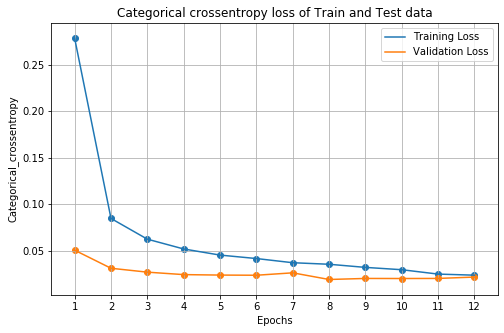

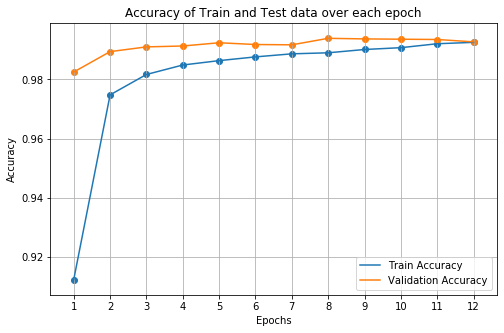

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))

vy = history_1.history['val_loss']
ty = history_1.history['loss']

plt.figure(figsize=(8,5))
plt.title("Categorical crossentropy loss of Train and Test data")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty)
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.title("Accuracy of Train and Test data over each epoch")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Accuracy")
plt.plot(x,history_1.history["acc"],label="Train Accuracy")
plt.scatter(x,history_1.history["acc"])
plt.plot(x,history_1.history["val_acc"],label="Validation Accuracy")
plt.scatter(x,history_1.history["val_acc"])
plt.legend()
plt.grid()
plt.show()

# CNN Model-2 with 5 Hidden Layers 

In [0]:
from keras.layers import BatchNormalization

model_2=Sequential()

model_2.add(Conv2D(96,(5,5),activation="relu",padding="same",strides=1,input_shape=input_shape))

model_2.add(Conv2D(96,(5,5),padding="same",strides=1,activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(96,(5,5),padding="same",strides=1,activation="relu"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64,(3,3),padding="same",strides=1,activation="relu"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64,(3,3),padding="same",strides=1,activation="relu"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))

model_2.add(Flatten())
model_2.add(BatchNormalization())

model_2.add(Dense(128,activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(num_classes,activation="softmax"))

In [0]:
model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_2=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 562us/step - loss: 0.6861 - acc: 0.7909 - val_loss: 0.0722 - val_acc: 0.9782
Epoch 2/12
60000/60000 [==============================] - 30s 504us/step - loss: 0.1209 - acc: 0.9665 - val_loss: 0.0402 - val_acc: 0.9875
Epoch 3/12
60000/60000 [==============================] - 30s 505us/step - loss: 0.0853 - acc: 0.9771 - val_loss: 0.0268 - val_acc: 0.9918
Epoch 4/12
60000/60000 [==============================] - 30s 504us/step - loss: 0.0665 - acc: 0.9816 - val_loss: 0.0463 - val_acc: 0.9856
Epoch 5/12
60000/60000 [==============================] - 30s 505us/step - loss: 0.0564 - acc: 0.9844 - val_loss: 0.0325 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 30s 502us/step - loss: 0.0495 - acc: 0.9864 - val_loss: 0.0221 - val_acc: 0.9936
Epoch 7/12
60000/60000 [==============================] - 30s 503us/step - loss: 0.0458 - acc: 0.9878 - val_loss: 0.

Test score: 0.01857770568885935
Test accuracy: 0.9951


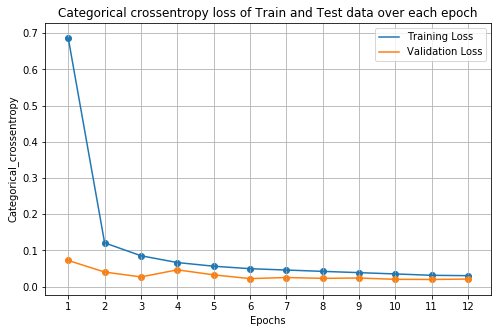

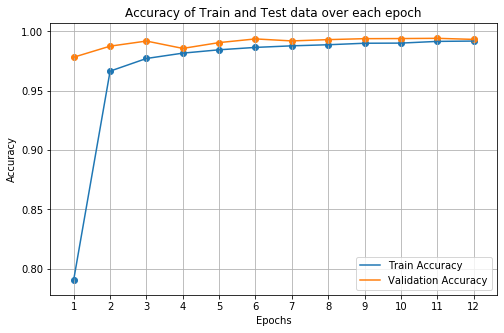

In [0]:
%matplotlib inline

score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))

vy = history_2.history['val_loss']
ty = history_2.history['loss']

plt.figure(figsize=(8,5))
plt.title("Categorical crossentropy loss of Train and Test data over each epoch")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty)
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.title("Accuracy of Train and Test data over each epoch")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Accuracy")
plt.plot(x,history_2.history["acc"],label="Train Accuracy")
plt.scatter(x,history_2.history["acc"])
plt.plot(x,history_2.history["val_acc"],label="Validation Accuracy")
plt.scatter(x,history_2.history["val_acc"])
plt.legend()
plt.grid()
plt.show()

# CNN Model-3 With 7 Hidden Layers

In [0]:
model_3=Sequential()

model_3.add(Conv2D(152,(7,7),activation="relu",padding="same",strides=1,input_shape=input_shape))

model_3.add(Conv2D(152,(7,7),padding="same",strides=1,activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(152,(7,7),padding="same",strides=1,activation="relu"))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128,(5,5),padding="same",strides=1,activation="relu"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128,(5,5),padding="same",strides=1,activation="relu"))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Conv2D(64,(3,3),padding="same",strides=1,activation="relu"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(64,(3,3),padding="same",strides=1,activation="relu"))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(BatchNormalization())

model_3.add(Dense(96,activation="relu"))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(64,activation="relu"))
model_3.add(BatchNormalization())

model_3.add(Dense(num_classes,activation="softmax"))

In [0]:
model_3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.6415 - acc: 0.7986 - val_loss: 0.1944 - val_acc: 0.9427
Epoch 2/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0924 - acc: 0.9751 - val_loss: 0.2869 - val_acc: 0.9238
Epoch 3/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0647 - acc: 0.9826 - val_loss: 0.0654 - val_acc: 0.9836
Epoch 4/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0525 - acc: 0.9857 - val_loss: 0.0435 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0421 - acc: 0.9885 - val_loss: 0.0362 - val_acc: 0.9913
Epoch 6/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0389 - acc: 0.9891 - val_loss: 0.0236 - val_acc: 0.9936
Epoch 7/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0356 - acc: 0.9900 - val_loss: 0.0323 - 

Test score: 0.02398924818391679
Test accuracy: 0.9925


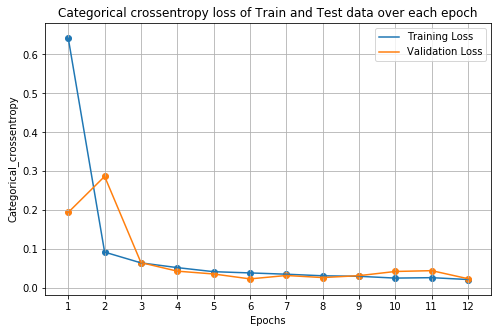

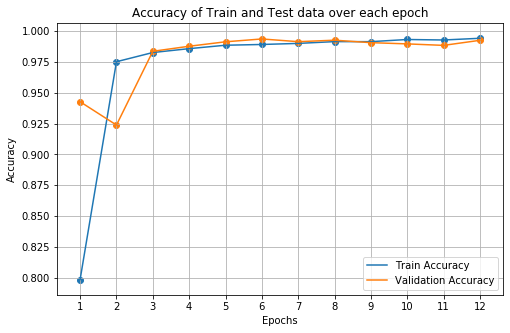

In [0]:
%matplotlib inline

score = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))

vy = history_3.history['val_loss']
ty = history_3.history['loss']

plt.figure(figsize=(8,5))
plt.title("Categorical crossentropy loss of Train and Test data over each epoch")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Categorical_crossentropy")
plt.plot(x,ty,label="Training Loss")
plt.scatter(x,ty)
plt.plot(x,vy,label="Validation Loss")
plt.scatter(x,vy)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.title("Accuracy of Train and Test data over each epoch")
plt.xlabel("Epochs")
plt.xticks(x)
plt.ylabel("Accuracy")
plt.plot(x,history_3.history["acc"],label="Train Accuracy")
plt.scatter(x,history_3.history["acc"])
plt.plot(x,history_3.history["val_acc"],label="Validation Accuracy")
plt.scatter(x,history_3.history["val_acc"])
plt.legend()
plt.grid()
plt.show()

# Conclusions:-

In [0]:
from prettytable import PrettyTable

table_1=PrettyTable()
table_1.field_names=("No. of Layers","Train Loss","Train Acc","Val Loss","Val Acc")
table_1.add_row(("CNN Model with 3 Hidden Layers",0.0235,0.9925,0.0215,0.9927))
table_1.add_row(("CNN Model with 5 Hidden Layers",0.0303,0.9918,0.0208,0.9932))
table_1.add_row(("CNN Model with 7 Hidden Layers",0.0220,0.9941,0.0240,0.9925))
print(table_1)

+--------------------------------+------------+-----------+----------+---------+
|         No. of Layers          | Train Loss | Train Acc | Val Loss | Val Acc |
+--------------------------------+------------+-----------+----------+---------+
| CNN Model with 3 Hidden Layers |   0.0235   |   0.9925  |  0.0215  |  0.9927 |
| CNN Model with 5 Hidden Layers |   0.0303   |   0.9918  |  0.0208  |  0.9932 |
| CNN Model with 7 Hidden Layers |   0.022    |   0.9941  |  0.024   |  0.9925 |
+--------------------------------+------------+-----------+----------+---------+
